# Part 1 of the Machine Learning Project

> Version 2022-10-10

**To be completed and submitted on Moodle by 26/10/2022**. Run your code and save/export your notebook in `.ipynb`, and upload it to Moodle.

Part 2 will be sent after, so this is an hard deadline. Part 2 contains the correction of part 1 and additional questions.

- Part 1 counts for 50 points
- Part 2 counts for 50 points

## Preliminaries


Before satring familiarize yourself with pandas reading the “10 minutes to pandas” tutorial: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html 

Browse through the full pandas user guide when needed: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html 


## Load libraries

In [3]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# File system manangement
import os

# Suppress warnings 
#import warnings
#warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<p><img alt="Datasets" src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" align="left" hspace="10px" vspace="0px"></p>


<h1>Datasets</h1>

In [5]:
## Change this part with your own dataset files

src_train = '/content/drive/MyDrive/DS/application_train.csv.zip'
src_test = '/content/drive/MyDrive/DS/application_test.csv.zip'

src_previous ='/content/drive/MyDrive/DS/previous_application.csv.zip'
src_bureau = '/content/drive/MyDrive/DS/bureau.csv.zip'

# If you cannot load the directly the csv from Google drive (Google restrictions), download them manually then change the path to load them locally

app_train = pd.read_csv(src_train, compression="zip")



<h1>Loading the datasets (2 pts)</h1>

1. Similarly to the train set, load the test set, the bureau dataset and the past applications dataset.

2. Display for each the number of rows and the number of columns

*You will be evaluated as follow*
* 1: Correct approach + code: 1pt
* 2: Code: 1pts


In [6]:
#Your code here
#The variables that should be implemented to store the data are: app_train, app_test, bureau, app_past


# 1 - Loading the different datasets.
app_test = pd.read_csv(src_test)
bureau = pd.read_csv(src_bureau)
app_past = pd.read_csv(src_previous)

# 2 - The number of rows and columns for each
print(f'Train set row~columns : {app_test.shape[0]}~{app_test.shape[1]}')
print(f'Test set row~columns : {app_test.shape[0]}~{app_test.shape[1]}')
print(f'Bureau set rows~columns : {bureau.shape[0]}~{bureau.shape[1]}')
print(f'Past applications set rows~columns : {app_past.shape[0]}~{app_past.shape[1]}')


Train set row~columns : 48744~121
Test set row~columns : 48744~121
Bureau set rows~columns : 1716428~17
Past applications set rows~columns : 1670214~37


<h1> Feature Engineering</h1>

<h2>Missing values (9pts)</h2>


**3.a**: What columns are missing the most values in app_test?

**3.b**: What columns are missing the most values in bureau?

**3.c**: What columns are missing the most values in app_past?

4: Fix missing data in app_test dataset using categorization and/or simple imputation when appropriate. Be careful to the **data leakage** issue!

*You will be evaluated as follow*
* 3: Correct approach + code 2pts.
* 4: Description of the approach 4pts. Code implementation of the approach 3pts. 

In [7]:
# 3

## Your code here

def get_missing_columns(df, top_N = 20):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
  missing  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  return missing.head(top_N)

print(get_missing_columns(app_test))

print(get_missing_columns(bureau))

print(get_missing_columns(app_past))


                          Total    Percent
COMMONAREA_AVG            33495  68.716150
COMMONAREA_MODE           33495  68.716150
COMMONAREA_MEDI           33495  68.716150
NONLIVINGAPARTMENTS_AVG   33347  68.412523
NONLIVINGAPARTMENTS_MODE  33347  68.412523
NONLIVINGAPARTMENTS_MEDI  33347  68.412523
FONDKAPREMONT_MODE        32797  67.284179
LIVINGAPARTMENTS_AVG      32780  67.249302
LIVINGAPARTMENTS_MODE     32780  67.249302
LIVINGAPARTMENTS_MEDI     32780  67.249302
FLOORSMIN_MEDI            32466  66.605121
FLOORSMIN_AVG             32466  66.605121
FLOORSMIN_MODE            32466  66.605121
OWN_CAR_AGE               32312  66.289184
YEARS_BUILD_AVG           31818  65.275726
YEARS_BUILD_MEDI          31818  65.275726
YEARS_BUILD_MODE          31818  65.275726
LANDAREA_MEDI             28254  57.964057
LANDAREA_AVG              28254  57.964057
LANDAREA_MODE             28254  57.964057
                          Total    Percent
AMT_ANNUITY             1226791  71.473490
AMT_CREDIT_

In [8]:
categorical_cols = app_test.select_dtypes(exclude='number').columns
numerical_cols = app_test.select_dtypes(include='number').columns

print(categorical_cols.shape, numerical_cols.shape)

(16,) (105,)


In [9]:
# 4: Fix missing data in app_test using categorization and/or simple imputation when appropriate. You should use *only* pandas and numpy here. You should *not* use sklearn (scikit-learn).

# Categorical Features
# Strategy 1: Filling with the most frequent class

app_test1 = app_test.copy()
for cat in categorical_cols:
  if app_test1[cat].isna().sum() >0:
    most_probable = app_train[cat].value_counts().index[0]  # we compute the most frequent class on the *train* set to avoid data leakage
    print("filling",app_test1[cat].isna().sum(), "values with most probable value:", most_probable)
    app_test1[cat] = app_test1[cat].fillna(most_probable)

filling 911 values with most probable value: Unaccompanied
filling 15605 values with most probable value: Laborers
filling 32797 values with most probable value: reg oper account
filling 23619 values with most probable value: block of flats
filling 23893 values with most probable value: Panel
filling 22209 values with most probable value: No


In [10]:
# Strategy 2: Filling with a Poisson sampling according to probability of class
from numpy.random import choice

app_test2 = app_test.copy()
for cat in categorical_cols:
  if app_test2[cat].isna().sum()>0:
    most_probable = app_train[cat].value_counts()
    values = list(most_probable.index)
    probas = most_probable.values / most_probable.values.sum()
    print("filling",app_test2[cat].isna().sum(), "values with most probable value:",values, probas)
    app_test2[cat] = app_test2[cat].fillna(lambda x: choice(most_probable.index,p=probas))  

filling 911 values with most probable value: ['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_B', 'Other_A', 'Group of people'] [0.81159562 0.13111205 0.03713029 0.01066884 0.00578018 0.00282804
 0.00088499]
filling 15605 values with most probable value: ['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers', 'High skill tech staff', 'Accountants', 'Medicine staff', 'Security staff', 'Cooking staff', 'Cleaning staff', 'Private service staff', 'Low-skill Laborers', 'Waiters/barmen staff', 'Secretaries', 'Realty agents', 'HR staff', 'IT staff'] [0.26139636 0.1520557  0.13058924 0.10122679 0.08811576 0.05390299
 0.04648067 0.04043672 0.03183498 0.02816408 0.0220396  0.01256158
 0.00991379 0.00638499 0.00618132 0.00355722 0.00266673 0.00249147]
filling 32797 values with most probable value: ['reg oper account', 'reg oper spec account', 'not specified', 'org spec account'] [0.75944289 0.12425938 0.0584986  0.05779913]
filling 23619 values with most probable value: 

In [11]:
# Strategy 3: Creating a category for missing values (best solution for categorical variables)
# we define this class with the "MISSING" string, which will create a category during the categorization step

app_test3 = app_test.copy()
for cat in categorical_cols:
  if app_test3[cat].isna().sum()>0:
    print("filling",app_test3[cat].isna().sum(), "values with MISSING")
    app_test3[cat] = app_test3[cat].fillna('MISSING')

filling 911 values with MISSING
filling 15605 values with MISSING
filling 32797 values with MISSING
filling 23619 values with MISSING
filling 23893 values with MISSING
filling 22209 values with MISSING


In [12]:
# Numerical features : Filling with median (mean can work as well)

app_test4 = app_test.copy()
app_test4[numerical_cols] = app_test4[numerical_cols].fillna(app_train[numerical_cols].median())  # we also compute the statistic on the train set to avoid data leakage


app_test_filled = app_test.copy()
app_test_filled[categorical_cols] = app_test3[categorical_cols]
app_test_filled[numerical_cols] = app_test4[numerical_cols]

**4**: Describe your approach, including how you choose the technique to apply, and how you apply the technique (double click to edit a text cell)



In [13]:
# to be used later to fix missing values of our train set the same way
def fill_missing(df):
  df = df.copy()
  categorical_cols = df.select_dtypes(exclude='number').columns
  numerical_cols = df.select_dtypes(include='number').columns

  for cat in categorical_cols:
    if df[cat].isna().sum()>0:
      df[cat] = df[cat].fillna('MISSING')

  df[numerical_cols] = df[numerical_cols].fillna(app_train[numerical_cols].median())

  return df

**Explanations**

*Categorical*

Using only pandas, we can perform one of these 3 simple techniques:

1. Imputation for the categorical missing values using the most frequent category of each variable. 
2. Random imputations are also possible. Here we first compute the relative frequencies of each class. Then, to fill the missing category, we randomly draw a class using using the relative frequencies as probabilities. This technique has the benefit of not over-representing the most frequent class. 
3. We can also create for each category a new value to count as "MISSING", it will lated be used in the one-hot encoding process. This is the best option since here we have enough missing examples to create a separate category. For variables with very few missing data, it would be better to perform some imputation to avoid unneceessary additional columnns.


*Numerical*

For numerical values, we can use the mean or the median. The median is generally better because less sensitive to outliers. The important point is to compute these statistics on the training set, since at test time, we will not have the full test set to compute these statistics. More generally, the same data processing should be applied on the train and the test sets.


*Remarks*

A more advanced technique based on domain knowledge is to apply these techniques but only on the other loans of the same clients. First, we can group by the column "SK_ID_CURR" (loan id), then do the same imputation (probability / mean). This more granular filling assumes that the same client should have similar distribution for missing values. Using aggregated values per loan id, one can sort the values of a client according to a column (for instance DAYS_BIRTH which is the age of the client). Once sorted, we can use pandas.DataFrame.interpolate to fill in the values using neighouboring values. 


Another technique, if you are allowed to use sklearn, is to use clustering on the numerical columns to identify the closest points to missing ones and propagate the missing attributes (like Label propagation seen in the course).


As a general remark: It also possible to remove totally the columns where the percentage of missing values is very high (>80%) for the first version of your models. However, it is generally not advisable since the few provided values may be important.

## Class Imbalance (8 pts)

5. Evaluate the class imbalance of the training set.

6. **a** Fix the class imbalance with over/undersampling

 **b** Use the SMOTE algorithm to fix class imbalance

*You will be evaluated as follow*
* 5: Correct approach + code: 2ts
* 6.a: code 3pt 
* 6.b: code 3pts

0    282686
1     24825
Name: TARGET, dtype: int64


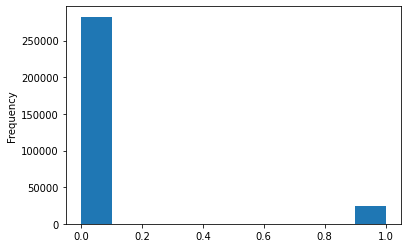

In [14]:
# 5 - value counts

print(app_train['TARGET'].value_counts())

# 5 - histograms

app_train['TARGET'].astype(int).plot.hist()

**5**: Describe briefly your observation (double click to edit a text cell)

In [15]:
# copy your current dataframe with its .copy() method. You should always use the copy() method if you want to keep the original dataframe untouched when you modify 
# this is a very common bug, so please read  https://www.statology.org/pandas-copy-dataframe/ 

## Your code here
app_train_original = app_train.copy()


# 6.a - fix imbalance with undersampling or oversampling
# Implement undersampling or oversampling *without* external libraries, only the library provided to implement yourself the chosen solution.

## Your code here

# both over/under sampling are present here for the sake of presentation. In practice, choose one.

### Oversampling: Adding more minority class until we have the same total as majority class
df = app_train_original.copy()
minority = df[df['TARGET']==1]
majority = df[df['TARGET']==0]
minority_sampled = minority.sample(n=len(majority)-len(minority), random_state=101, replace=True)
df = pd.concat([minority,minority_sampled,majority],axis=0)

### Undersampling 
df = app_train_original.copy()
minority = df[df['TARGET']==1]
majority = df[df['TARGET']==0]
majority = majority.sample(n=len(minority), random_state=101)
df = pd.concat([minority,majority],axis=0)

In [16]:

# 6.b - fix balance with SMOTE on your previously copied dataframe
# You can use any external libraries to use SMOTE. We recommend the imbalanced-learn package https://imbalanced-learn.org/stable/over_sampling.html 
# Make sure to select the appropriate SMOTE variant.

from imblearn.over_sampling import SMOTENC
## Your code here
X = fill_missing(app_train.drop('TARGET', axis=1))  # do not forget to fix missing data on the train set to!
categorical_features=list(X.select_dtypes(exclude='number').columns)
X[categorical_features] = X[categorical_features].astype('string')
categorical_features_index = [i for i,c in enumerate(X.columns) if c in categorical_features]
X_resampled, y_resampled = SMOTENC(categorical_features=categorical_features_index).fit_resample(X, app_train['TARGET'])

In [17]:
app_train_smote = pd.DataFrame(columns = X.columns, data=X_resampled)
app_train_smote["TARGET"] = y_resampled

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [18]:
# We will use the dataframe app_train from 6.a in the following
app_train = df

In [20]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
np.savetxt('app_train_6a.csv', app_train, delimiter=" ", fmt="%s")

<h2>Categorical features (9pts)</h2>

In app_test

**7a**: How will you transform the column NAME_HOUSING_TYPE in app_test be correctly handled by the model? How will you transform CODE_GENDER column?

**7b**: How would you transform the column NAME_HOUSING_TYPE in app_test if you want only 3 categories? Use LabelEncoder to transform FLAG_OWN_CAR column.

**7c**: In ORGANIZATION_TYPE, only keep the categories that appear in more than 10% of the dataset. Group other categories in one. What is the size of the dummy vector for ORGANIZATION_TYPE after this transformation?


8: **In app_test, app_past and bureau,** transform all the categorical columns that you have not processed in 7 using One-hot encoding.

*You will be evaluated as follow*
* 7: Description of the approach 4pts. Code 3pts.
* 8: Correct approach + code 2pts. 

In [ ]:
## Your code here
app_test_cat = app_test.copy()

### 7.a: We will use one hot encoding with 6 categories
print(app_test_cat.NAME_HOUSING_TYPE.value_counts())
one_hot_housing_type = pd.get_dummies(app_test_cat['NAME_HOUSING_TYPE'],prefix="HOUSING_TYPE")

### 7.a: We will use one hot encoding with 2 categories
print(app_test_cat.CODE_GENDER.value_counts())
one_hot_gender = pd.get_dummies(app_test_cat['CODE_GENDER'],prefix="GENDER")

House / apartment      43645
With parents            2234
Municipal apartment     1617
Rented apartment         718
Office apartment         407
Co-op apartment          123
Name: NAME_HOUSING_TYPE, dtype: int64
F    32678
M    16066
Name: CODE_GENDER, dtype: int64


In [ ]:
### 7.b: We will use one hot encoding with 6 categories

top_housing = app_test_cat.NAME_HOUSING_TYPE.value_counts().index[0:2]
print(top_housing)
app_test_cat.loc[~app_test_cat.NAME_HOUSING_TYPE.isin(top_housing),"NAME_HOUSING_TYPE"]="OTHER"
print(app_test_cat.NAME_HOUSING_TYPE.value_counts())
one_hot_housing_type = pd.get_dummies(app_test_cat['NAME_HOUSING_TYPE'],prefix="HOUSING_TYPE")

Index(['House / apartment', 'With parents'], dtype='object')
House / apartment    43645
OTHER                 2865
With parents          2234
Name: NAME_HOUSING_TYPE, dtype: int64


In [ ]:
### 7.b: Transform FLAG_OWN_CAR
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(app_test_cat.FLAG_OWN_CAR)
app_test_cat.FLAG_OWN_CAR = le.transform(app_test_cat.FLAG_OWN_CAR)
app_test_cat.FLAG_OWN_CAR.value_counts()

0    32311
1    16433
Name: FLAG_OWN_CAR, dtype: int64

In [ ]:
### 7.b: Transform ORGANIZATION_TYPE. By keeping the categories with > 10% we end up with 4 categories

X = app_test_cat.ORGANIZATION_TYPE.value_counts(normalize=True)
merge_columns = X[X.values<0.1].index

app_test_cat.loc[app_test_cat.ORGANIZATION_TYPE.isin(merge_columns),"ORGANIZATION_TYPE"]="OTHER"
print(app_test_cat.ORGANIZATION_TYPE.value_counts())

OTHER                     22710
Business Entity Type 3    10840
XNA                        9274
Self-employed              5920
Name: ORGANIZATION_TYPE, dtype: int64


In [ ]:
### 8: 

app_test_cat = pd.get_dummies(app_test_cat, dummy_na=True)
app_past_cat = pd.get_dummies(app_past, dummy_na=True)
bureau_cat = pd.get_dummies(bureau, dummy_na=True)

<h2>Anomalies (7 pts)</h2>

**In app_test**

**9a**: Is there an anomaly with the column DEF_30_CNT_SOCIAL_CIRCLE? If so, how would you solve it?

**9b**: Is there an anomaly with the column LANDAREA_AVG? If so, how would you solve it?

**9c**: Is there an anomaly with the column AMT_INCOME_TOTAL? If so, how would you solve it?

10: Fix the anomaly in DAYS_EMPLOYED?

*You will be evaluated as follow*
* 9: Description of the approach + code 5pts.
* 10: code 2pts

count    48715.000000
mean         0.143652
std          0.514413
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64
count    48715.000000
mean         0.101139
std          0.403791
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


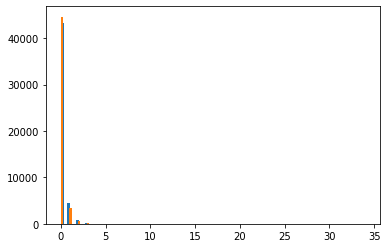

In [ ]:
## Your code here
## 9a: According to definitions provided, the variable DEF_30_CNT_SOCIAL_CIRCLE means How many observation of client's social surroundings defaulted on 30 DPD (days past due).
## Therefore the possibles values just need to be intgers. Which is the case. The only issue are the NaN values.
## We also study DEF_60_CNT_SOCIAL_CIRCLE which is supposed to be related to DEF_30_CNT_SOCIAL_CIRCLE to check for coherence issues. There are none.
print(app_test.DEF_30_CNT_SOCIAL_CIRCLE.describe())
print(app_test.DEF_60_CNT_SOCIAL_CIRCLE.describe())

plt.hist(app_test.DEF_30_CNT_SOCIAL_CIRCLE,100)
plt.hist(app_test.DEF_60_CNT_SOCIAL_CIRCLE, 100)

plt.show()

In [ ]:
###9b: There are ~5% rows where LANDAREA_AVG = 0. Those are impossible values. They need to be removed
app_test['LANDAREA_AVG'].describe()
print(len(app_test[app_test['LANDAREA_AVG'] == 0]) / len(app_test['LANDAREA_AVG'])*100)
app_test_fixed = app_test[app_test['LANDAREA_AVG'] != 0]

5.448875759067782


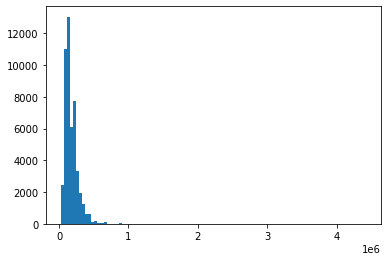

count    4.874400e+04
mean     1.784318e+05
std      1.015226e+05
min      2.694150e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.250000e+05
max      4.410000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
###9c: AMT_INCOME_TOTAL is the Income of the client; It just need to be a positive float number. Which is the case. 
plt.hist(app_test.AMT_INCOME_TOTAL,100)
plt.show()
app_test.AMT_INCOME_TOTAL.describe()

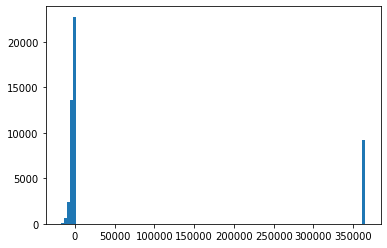

19.02593139668472
count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


In [ ]:
###10 Anomaly of DAYS_EMPLOYED: There are negative values and positive values > 350k. 
### DAYS_EMPLOYED refer to How many days before the application the person started current employment,time only relative to the application
### Therefore it can only be negative. There however 19% of positive values that need to be removed
plt.hist(app_test.DAYS_EMPLOYED,100)
plt.show()

print(len(app_test[app_test['DAYS_EMPLOYED'] > 0]) / len(app_test['DAYS_EMPLOYED'])* 100)
print(app_test['DAYS_EMPLOYED'].describe())

app_test_fixed = app_test_fixed[app_test_fixed['DAYS_EMPLOYED'] < 0]

<h2>Correlations (9 pts)</h2>


11: **In app_test**, remove the collinear features of the dataset. How did you choose the threshold?

12: What features from bureau.csv could you use to improve the training set? Use the random forest model from the notebook of the Lecture to check if it actually improves the final model performance.

*You will be evaluated as follow*
* 11: Code 3pts. Threshold explanation 1pt.
* 12: Description of the approach 1pt. Code implementation of the approach 2pts. Improved performance 2pts.

In [ ]:
## Your code here
###11: We select the threshold of 95% that gives an initial correlated features of 30. If we move to threhold of 0.8, it increases the number of correlated features to 39. Which suggest that 95% threshold is enough.
app_test_uncorrelated = app_test.copy()

def get_correlated(df, correlation_threshold = 0.95):
  correlations = df.corr(method='pearson')
  corrs = correlations.where(np.triu(np.ones(correlations.shape)).astype(np.bool))

  corrs = corrs.stack().reset_index()
  corrs.columns = ['Row','Column','Value']
  return corrs[(corrs["Value"]>correlation_threshold) & (corrs["Value"]<1)].sort_values(by="Value",ascending=False)

In [ ]:
len(get_correlated(app_test, 0.8).Row.unique())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


39

In [ ]:
high_corr = get_correlated(app_test_uncorrelated)
while(len(high_corr)>0):
  column_to_drop = high_corr["Row"].values[0]
  print("dropping feature",column_to_drop)
  app_test_uncorrelated = app_test_uncorrelated.drop(column_to_drop, axis=1)
  high_corr = get_correlated(app_test_uncorrelated)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


dropping feature OBS_30_CNT_SOCIAL_CIRCLE
dropping feature YEARS_BUILD_AVG
dropping feature YEARS_BEGINEXPLUATATION_AVG
dropping feature LIVINGAPARTMENTS_AVG
dropping feature FLOORSMIN_AVG
dropping feature FLOORSMAX_AVG
dropping feature APARTMENTS_AVG
dropping feature ENTRANCES_AVG
dropping feature ELEVATORS_AVG
dropping feature COMMONAREA_AVG
dropping feature NONLIVINGAREA_AVG
dropping feature LIVINGAREA_AVG
dropping feature BASEMENTAREA_AVG
dropping feature LANDAREA_AVG
dropping feature YEARS_BUILD_MODE
dropping feature FLOORSMIN_MODE
dropping feature FLOORSMAX_MODE
dropping feature AMT_CREDIT
dropping feature LANDAREA_MODE
dropping feature ELEVATORS_MODE
dropping feature NONLIVINGAPARTMENTS_AVG
dropping feature NONLIVINGAREA_MODE
dropping feature ENTRANCES_MODE
dropping feature COMMONAREA_MODE
dropping feature APARTMENTS_MODE
dropping feature NONLIVINGAPARTMENTS_MODE
dropping feature LIVINGAREA_MODE
dropping feature LIVINGAPARTMENTS_MODE
dropping feature YEARS_BEGINEXPLUATATION_MODE

In [ ]:
###12: Building a RF following the Lecture - No need to optimize the hyper-parameters or to improve the training features for now 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## we need to also remove the ID of the loan otherwise it will bias the learning towards this and may cause data leakage for test loans with the same id
X = app_train.drop("TARGET",1).drop("SK_ID_CURR",1)
X_dummy = pd.get_dummies(X, drop_first=True,dummy_na=True).dropna()
Y  = app_train["TARGET"][X_dummy.index]
X_train, X_val, y_train, y_val = train_test_split(X_dummy, Y, test_size=0.33, random_state=101)

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 101, verbose = 1, n_jobs = -1)
random_forest.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestClassifier(n_jobs=-1, random_state=101, verbose=1)

In [ ]:
## Evaluating original training set

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

predicted = random_forest.predict(X_val)
report = classification_report(y_val, predicted)
auc = roc_auc_score(y_val, predicted)
print("auc",auc)
print(report)

auc 0.6126364328623404
              precision    recall  f1-score   support

           0       0.66      0.84      0.74       318
           1       0.63      0.39      0.48       223

    accuracy                           0.65       541
   macro avg       0.64      0.61      0.61       541
weighted avg       0.65      0.65      0.63       541



[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
### Evaluating new training set

In [ ]:
### When we combine all features from bureau but only the first row of bureau per SK_ID_CURR, the performances get much worse. We need to preserve some information from all Bureau ==> aggregations

first_bureau = bureau["SK_ID_CURR"].duplicated(keep='first')
mergedX = pd.merge(app_train, bureau[~first_bureau], on="SK_ID_CURR", how="left")

X_dummy = pd.get_dummies(mergedX, drop_first=True,dummy_na=True).dropna().drop("TARGET",1).drop("SK_ID_CURR",1)
Y  = mergedX["TARGET"][X_dummy.index]
X_train, X_val, y_train, y_val = train_test_split(X_dummy, Y, test_size=0.33, random_state=101)

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 101, verbose = 1, n_jobs = -1)
random_forest.fit(X_train, y_train)

predicted = random_forest.predict(X_val)
report = classification_report(y_val, predicted)
auc = roc_auc_score(y_val, predicted)
print("auc",auc)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


auc 0.5
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.00      0.00      0.00         4

    accuracy                           0.56         9
   macro avg       0.28      0.50      0.36         9
weighted avg       0.31      0.56      0.40         9



[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [ ]:
### Using aggregation, we can see that keeping all the features from Bureau improves the performances compared to using raw features from bureau alone.
### Still the original model without features from Bureau remains better, i.e., advanced feature engineering is needed to process the additional information from bureau

bureau_agg = bureau.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index = False) \
  .agg(['count', 'mean', 'max', 'min', 'sum', 'std']).reset_index()
bureau_agg.columns = ['_'.join(col) if col[0]!="SK_ID_CURR" else "SK_ID_CURR" for col in bureau_agg.columns]

mergedX = pd.merge(app_train, bureau_agg, on="SK_ID_CURR", how="left")

X_dummy = pd.get_dummies(mergedX, drop_first=True,dummy_na=True).dropna().drop("TARGET",1).drop("SK_ID_CURR",1)
Y  = mergedX["TARGET"][X_dummy.index]
X_train, X_val, y_train, y_val = train_test_split(X_dummy, Y, test_size=0.33, random_state=101)

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 101, verbose = 1, n_jobs = -1)
random_forest.fit(X_train, y_train)

predicted = random_forest.predict(X_val)
report = classification_report(y_val, predicted)
auc = roc_auc_score(y_val, predicted)
print("auc",auc)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s


auc 0.5701552616446233
              precision    recall  f1-score   support

           0       0.62      0.68      0.65        47
           1       0.53      0.46      0.49        37

    accuracy                           0.58        84
   macro avg       0.57      0.57      0.57        84
weighted avg       0.58      0.58      0.58        84



[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


##  Class imbalance and model performances (6 points)


**13**: Evaluate the other technique (SMOTE) to handeling imbalance data left in *6.b*. Does it makes a difference on the final model performance? Can you use the performance on the test set to choose which techniques to use? If not, what would you need to do so?

*You will be evaluated as follow*
* 13: Code 3pts. Explanation 3pts.


In [ ]:
## Your code here

## we need to also remove the ID of the loan otherwise it will bias the learning towards this and may cause data leakage for test loans with the same id
X = app_train_smote.drop("TARGET",1).drop("SK_ID_CURR",1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
categorical_cols_X = X.select_dtypes(exclude='number').columns
X[categorical_cols_X] = X[categorical_cols_X].astype("str")
X_dummy = pd.get_dummies(X, drop_first=True,dummy_na=True).dropna()
Y  = app_train_smote["TARGET"][X_dummy.index]
X_train, X_val, y_train, y_val = train_test_split(X_dummy, Y, test_size=0.33, random_state=101)


In [ ]:
X_dummy.shape

(565372, 250)

In [ ]:
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 101, verbose = 1, n_jobs = -1)
random_forest.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.7min finished


RandomForestClassifier(n_jobs=-1, random_state=101, verbose=1)

In [ ]:
predicted = random_forest.predict(X_val)
report = classification_report(y_val, predicted)
auc = roc_auc_score(y_val, predicted)
print("auc",auc)
print(report)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    9.6s finished


auc 0.9476441169592794
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     93448
           1       0.99      0.90      0.95     93125

    accuracy                           0.95    186573
   macro avg       0.95      0.95      0.95    186573
weighted avg       0.95      0.95      0.95    186573



**Explanations**

The very high performances when splitting the augmented train/val set with SMOTE indicates a data leakage. Indeed the app_train_smote dataset has been augmented with SMOTE, and the examples generated are therefore strongly related to the original points. When we split an augmented dataset into training and validation, there is high chance that very similar values appear both in train and validation. Which explains the artificially high performances. 

Moreover, if we would have access to the labels of the test set, we could compute the test performances. However, we must not select any hyperparameters or techniques based on the test set, to keep an unbiased estimate of the performances. This is also true for choosing the techniques al along the pipeline, including the data processing steps.

Overall, what we need to do, is to split our dataset into train/validation at the begining of the pipeline (as done in the following part of the project) to also avoid data leakage between train and validation.